In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [41]:
# Load CSV file into the df
crypto_df = pd.read_csv('Resources/crypto_data.csv')
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [42]:
# Exploratory data analysis
crypto_df.shape

(1252, 7)

In [43]:
crypto_df.value_counts()

Unnamed: 0  CoinName     Algorithm    IsTrading  ProofType  TotalCoinsMined  TotalCoinSupply
1337        EliteCoin    X13          True       PoW/PoS    2.927942e+10     314159265359       1
POKER       PokerCoin    Scrypt       False      PoS/PoW    0.000000e+00     466666667          1
PKB         ParkByte     SHA-256      True       PoW/PoS    0.000000e+00     25000000           1
PLNC        PLNCoin      Scrypt       True       PoW/PoS    1.708960e+07     38540000           1
PLTC        PlatinCoin   CryptoNight  True       PoW        8.430000e+04     600000518          1
                                                                                               ..
FAIR        FairCoin     Groestl      True       PoW/PoS    5.319383e+07     0                  1
FC2         Fuel2Coin    X11          True       PoS        0.000000e+00     100000000          1
FCN         FantomCoin   CryptoNight  True       PoW        0.000000e+00     18400000           1
FIBRE       FIBRE        

In [44]:
# Filter for currencies that are currently being traded
crypto_df = crypto_df[crypto_df['IsTrading'] == True]
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [45]:
# Drop [IsTrading] column
crypto_df = crypto_df.drop(columns ='IsTrading')

In [46]:
# Check null values
crypto_df.isnull().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [47]:
# Remove rows with null values
crypto_df = crypto_df.dropna()

In [48]:
# Verify nulls are dropped
crypto_df.isnull().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [49]:
# Filter for cryptocurrencies that have been mined
crypto_df = crypto_df[crypto_df["TotalCoinsMined"]> 0]
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [50]:
# Save CoinName column for t-SNE
CoinName=pd.DataFrame(crypto_df['CoinName']).reset_index(drop=True)
CoinName

,CoinName
0,42 Coin
1,404Coin
2,EliteCoin
3,Bitcoin
4,Ethereum
...,...
527,ZEPHYR
528,Gapcoin
529,Beldex
530,Horizen


In [51]:
# Since the coin names do not contribute to the analysis of the data, 
# delete the CoinName from the dataframe.
crypto_df.drop(columns='CoinName', axis=1, inplace= True)
crypto_df

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [52]:
# Drop Unamed:0 columns
crypto_df = crypto_df.drop(columns=['Unnamed: 0'])
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [53]:
# convert Algorithm and ProofType into numerical data
X = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])

In [54]:
# View column names 
X.columns

Index(['TotalCoinsMined', 'TotalCoinSupply',
       'Algorithm_1GB AES Pattern Search', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_NIST5', 'Algor

In [55]:
# Standarize dataset
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(X)

In [56]:
# Number of features in datast
len(X.columns)

98

In [59]:
#Applying PCA to reduce dimensions from 98 to 4
pca = PCA(n_components=4)

# Get three principal components for the crypto data.
crypto_pca1 = pca.fit_transform(crypto_scaled)

In [60]:
# Transform PCA data to a DataFrame
df_crypto_pca1 = pd.DataFrame(data=crypto_pca1, 
                             columns=["PC 1", "PC 2", "PC 3", "PC4"])
df_crypto_pca1.head()

,PC 1,PC 2,PC 3,PC4
0,-0.338852,1.064528,-0.544307,-0.018748
1,-0.322215,1.064758,-0.544629,-0.018766
2,2.303565,1.656119,-0.677316,-0.029727
3,-0.143614,-1.376972,0.102027,-0.001937
4,-0.150012,-2.090816,0.347812,0.020585


In [61]:
# Fetch explained variance
pca.explained_variance_ratio_

array([0.02793059, 0.02141181, 0.02049969, 0.02044356])

In [62]:
# Preserve 90% of the explained variance in dimensionality reduction using PCA
pca2 = PCA(n_components=.90)

# Get three principal components for the crypto data.
crypto_pca = pca2.fit_transform(crypto_scaled)
crypto_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
         7.87306563e-16, -1.84616729e-18, -4.15361072e-15],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
         1.17409449e-15,  5.25116470e-16, -3.80497340e-15],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
         2.75207903e-14, -2.36464424e-14,  2.84400186e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
         1.93578889e-14, -8.67896697e-15, -3.66917605e-14],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
        -1.78255127e-15, -2.03579310e-16, -4.38160754e-16],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
        -4.70588149e-16, -9.07306180e-17, -2.78763670e-15]])

In [63]:
# Transform PCA data to DataFrame
transformed_crypto_pca = pd.DataFrame(data=crypto_pca)
transformed_crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,2.734816e-12,-5.417255e-15,-1.223976e-16,-0.007129,-1.319756,-0.051813,...,7.930746e-17,1.066184e-15,2.929092e-15,-7.260564e-16,-1.958946e-15,1.858141e-15,-1.863509e-15,7.873066e-16,-1.846167e-18,-4.153611e-15
1,-0.318434,1.032331,-0.591126,0.001386,2.712386e-12,-5.575109e-15,-2.141355e-16,-0.007739,-1.322514,-0.056674,...,5.236227e-17,3.558103e-16,3.123007e-15,-5.243003e-17,-1.703046e-15,1.069014e-15,-1.856951e-15,1.174094e-15,5.251165e-16,-3.804973e-15
2,2.305468,1.656383,-0.683617,0.004731,9.322259e-12,-6.700325e-15,7.872127e-15,-0.054781,-1.542879,-0.943951,...,3.638111e-14,-1.841986e-14,-5.521324e-14,-7.303804e-14,2.329683e-14,-3.527460e-14,3.114482e-14,2.752079e-14,-2.364644e-14,2.844002e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-2.420624e-12,2.357806e-15,-1.697979e-15,-0.002071,0.281463,0.251862,...,4.765898e-15,2.352318e-17,-2.522688e-14,6.604406e-15,-9.542520e-15,-1.391009e-14,2.591484e-15,2.225494e-15,4.614234e-15,4.660314e-15
4,-0.151768,-2.036192,0.396182,-0.001705,-3.352037e-12,2.706411e-15,-1.587523e-15,0.027735,0.519099,0.188820,...,-3.035501e-14,6.137487e-14,-3.172419e-14,-3.873903e-14,-7.522860e-14,-7.057959e-14,4.784940e-14,9.436182e-15,1.251016e-13,-3.544121e-15


In [64]:
# Fetch explained variance
pca.explained_variance_ratio_

array([0.02793059, 0.02141181, 0.02049969, 0.02044356])

([<matplotlib.axis.XTick at 0x137e390fa90>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

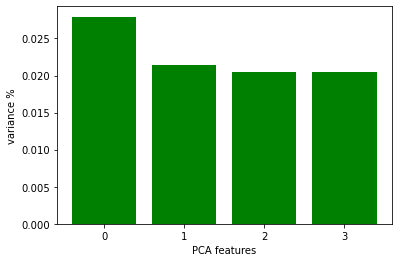

In [65]:
# Plot explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='green')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [66]:
# Number of features
len(transformed_crypto_pca.columns)

74

In [67]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [68]:
# Reduce dimensionsa and check that dimensions have been reduced to two
tsne_features = tsne.fit_transform(transformed_crypto_pca)
tsne_features.shape

C:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(532, 2)

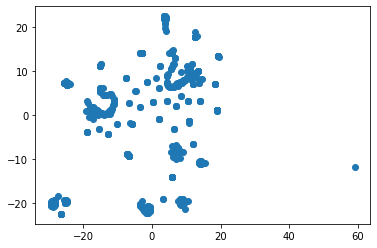

In [69]:
# The columns of transformed features and plot
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [70]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(transformed_crypto_pca)
    inertia.append(km.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [71]:
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,46979.075160
1,2,45721.481085
2,3,44826.964540
3,4,43776.296588
4,5,43291.951931


Text(0.5, 1.0, 'Elbow curve')

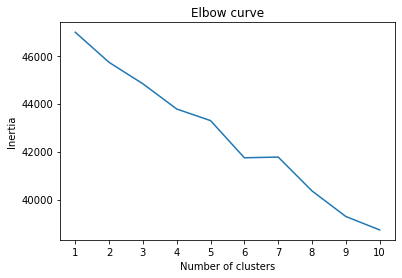

In [72]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve') 

In [73]:
k_means_df = pd.DataFrame(tsne_features).reset_index(drop=True)
k_means_df

,0,1
0,-17.888680,1.531575
1,-11.809874,4.676860
2,-23.805391,7.157695
3,-29.430925,-20.302473
4,19.334381,13.366604
...,...,...
527,-27.358271,-18.324350
528,-12.033366,1.200473
529,4.146619,22.027924
530,12.602138,17.770832


In [74]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=42)

# Train the model
model.fit(k_means_df)

# Predict clusters
predictions = model.predict(k_means_df)

# Create return DataFrame with predicted clusters
k_means_df["class"] = model.labels_
k_means_df.head()

,0,1,class
0,-17.888680,1.531575,3
1,-11.809874,4.676860,3
2,-23.805391,7.157695,3
3,-29.430925,-20.302473,0
4,19.334381,13.366604,2


In [75]:
# Check class value counts
k_means_df['class'].value_counts()

2    212
3    147
1    125
0     48
Name: class, dtype: int64

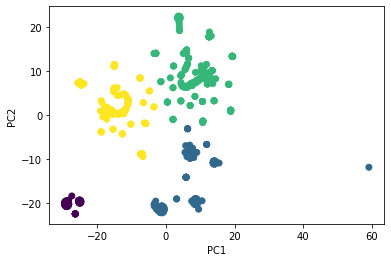

In [76]:
# Visualize the clusters
plt.scatter(k_means_df[0], k_means_df[1], c=k_means_df['class'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [77]:
# Add CoinName to df
final_df = pd.concat([CoinName, k_means_df],axis=1, sort=False)
final_df                         

,CoinName,0,1,class
0,42 Coin,-17.888680,1.531575,3
1,404Coin,-11.809874,4.676860,3
2,EliteCoin,-23.805391,7.157695,3
3,Bitcoin,-29.430925,-20.302473,0
4,Ethereum,19.334381,13.366604,2
...,...,...,...,...
527,ZEPHYR,-27.358271,-18.324350,0
528,Gapcoin,-12.033366,1.200473,3
529,Beldex,4.146619,22.027924,2
530,Horizen,12.602138,17.770832,2


In [78]:
# Analyze dataset by class
class_one = final_df.loc[final_df['class'] == 1]
class_one

,CoinName,0,1,class
6,Dash,-1.035586,-21.384953,1
10,Bitshares,6.357138,-3.099430,1
16,Spreadcoin,9.195877,-19.215502,1
33,CryptCoin,8.318441,-19.064329,1
42,Exclusive Coin,14.417230,-10.908245,1
...,...,...,...,...
510,Creditbit,10.554049,-19.420246,1
513,HiCoin,7.139053,-7.474124,1
524,Particl,13.921918,-11.042726,1
526,Nxt,15.509964,-10.846624,1


In [80]:
# Global average of total coins mined
import numpy as np

total_coins_mined_avg = crypto_df['TotalCoinsMined'].mean()
total_coins_mined_avg

5340455863.317298

### Summary

Based on my findings, cryptocurrencies can be clustered together into 4 distinct groups.
